Amelia Sayes

ams2638

Adv ML Project #2 - Neural Networks for Covid X-Ray image data

In [ ]:
! pip install aimodelshare --upgrade

## Data Setup

In [ ]:
import sys
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import zipfile

from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/covid_radiography_data/COVID-19_Radiography_Dataset.zip

In [ ]:
# Extracting all filenames iteratively
base_path = 'COVID-19_Radiography_Dataset'
categories = ['COVID/images', 'Normal/images', 'Viral Pneumonia/images']

# load file names to fnames list object
fnames = []
for category in categories:
    image_folder = os.path.join(base_path, category)
    file_names = os.listdir(image_folder)
    full_path = [os.path.join(image_folder, file_name) for file_name in file_names]
    fnames.append(full_path)

print('number of images for each category:', [len(f) for f in fnames])
print(fnames[0:2]) #examples of file names

number of images for each category: [3616, 10192, 1345]
[['COVID-19_Radiography_Dataset/COVID/images/COVID-2579.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1097.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3339.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1157.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2970.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3183.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2800.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-696.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-997.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3148.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3165.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3585.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-103.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3342.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-140.png', 'COVID-19_Radiography_Dataset/COVID/images/COV

In [ ]:
#Reduce number of images to first 1345 for each category
fnames[0]=fnames[0][0:1344]
fnames[1]=fnames[1][0:1344]
fnames[2]=fnames[2][0:1344]

In [ ]:
# Import image, load to array of shape height, width, channels, then min/max transform.
# Write preprocessor that will match up with model's expected input shape.
from keras.preprocessing import image
import numpy as np
from PIL import Image

def preprocessor(img_path):
        img = Image.open(img_path).convert("RGB").resize((192,192)) # import image, make sure it's RGB and resize to height and width you want.
        img = (np.float32(img)-1.)/(255-1.) # min max transformation
        img=img.reshape((192,192,3)) # Create final shape as array with correct dimensions for Keras
        return img



#Try on single file (imports file and preprocesses it to data with following shape)
preprocessor('COVID-19_Radiography_Dataset/COVID/images/COVID-2273.png').shape

(192, 192, 3)

In [ ]:
#Import image files iteratively and preprocess them into array of correctly structured data

# Create list of file paths
image_filepaths=fnames[0]+fnames[1]+fnames[2]

# Iteratively import and preprocess data using map function

# map functions apply your preprocessor function one step at a time to each filepath
preprocessed_image_data=list(map(preprocessor,image_filepaths ))

# Object needs to be an array rather than a list for Keras (map returns to list object)
X= np.array(preprocessed_image_data) # Assigning to X to highlight that this represents feature input data for our model

In [ ]:
# Create y data made up of correctly ordered labels from file folders
from itertools import repeat

# Recall that we have five folders with the following number of images in each folder 
#...corresponding to each flower type

print('number of images for each category:', [len(f) for f in fnames])
covid=list(repeat("COVID", 1344))
normal=list(repeat("NORMAL", 1344))
pneumonia=list(repeat("PNEUMONIA", 1344))

#combine into single list of y labels
y_labels = covid+normal+pneumonia

#check length, same as X above
print(len(y_labels) )

# Need to one hot encode for Keras.  Let's use Pandas

import pandas as pd
y=pd.get_dummies(y_labels)

display(y)

number of images for each category: [1344, 1344, 1344]
4032


,COVID,NORMAL,PNEUMONIA
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
4027,0,0,1
4028,0,0,1
4029,0,0,1
4030,0,0,1


In [ ]:
# ======Train test split resized images (Hackathon Note!! Use same train test split to be able to submit predictions to leaderboard!)=======================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.32, random_state = 1987)


X_test.shape, y_test.shape

((1291, 192, 192, 3), (1291, 3))

In [ ]:
#Clear objects from memory
del(X)
del(y)
del(preprocessed_image_data)

In [ ]:
#Save data to be able to reload quickly if memory crashes or if you run Runtime>Restart Runtime
import pickle

# Open a file and use dump()
with open('X_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(X_train, file)

#Save data
import pickle

# Open a file and use dump()
with open('X_test.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(X_test, file)

#Save data
import pickle

# Open a file and use dump()
with open('y_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(y_train, file)


# Open a file and use dump()
with open('y_test.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(y_test, file)

## 1. Visualize images that demonstrate when x-rays demonstrate Covid Positivity and when they do not 
(You can present visuals of each category in the data if you would like to.).

### Images of xrays of covid patients

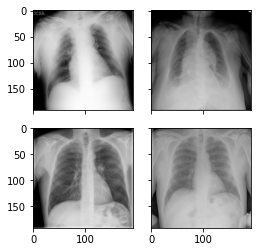

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import random

im1 = preprocessor(fnames[0][0])
im2 = preprocessor(fnames[0][1]) 
im3 = preprocessor(fnames[0][2]) 
im4 = preprocessor(fnames[0][3])

fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.25,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [im1, im2, im3, im4]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
plt.show()

### Images of patients with pneumonia

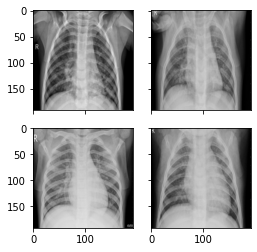

In [ ]:
im1 = preprocessor(fnames[2][0])
im2 = preprocessor(fnames[2][1]) 
im3 = preprocessor(fnames[2][2]) 
im4 = preprocessor(fnames[2][3])

fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.25,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [im1, im2, im3, im4]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
plt.show()

### Images of patients with no illnesses ("normal")

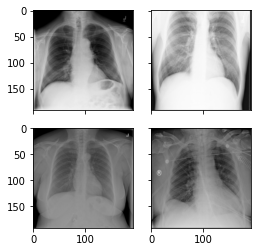

In [ ]:
im1 = preprocessor(fnames[1][0])
im2 = preprocessor(fnames[1][1]) 
im3 = preprocessor(fnames[1][2]) 
im4 = preprocessor(fnames[1][3])

fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.25,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [im1, im2, im3, im4]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
plt.show()

## 2. Discuss the dataset in general terms and describe why building a predictive model using this data might be practically useful.  
Who could benefit from a model like this? Explain.

This dataset contains images of chest xrays for patients who have covid-19, have pneumonia and for those who are healthy ("normal"). The dataset contains images and the relevant labels of these images for classification into these three groups.

Building a predictive model for this data will mean that we are trying to predict whether a patient has covid, pneumonia or is healthy from their xray image alone. This is useful as it could automate the diagnosis of these diseases / detect whether someone is healthy. This would benefit doctors in speeding up their analysis of xrays, and also benefit patients by allowing fast diagnosis. 

## 3. Run at least three prediction models to try to predict x-ray images well

Use transfer learning for at least one of these models

Discuss which models performed better and point out relevant hyper-parameter values for successful models.

Submit your best three models to the leader board for the Covid X-ray Diagnostic AI Model Share competition.

### Setup

####Modules and data to reload

In [ ]:
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D, Conv1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications import VGG19, ResNet50, InceptionV3

In [ ]:
import pickle
  
# Open the file in binary mode
with open('X_train.pkl', 'rb') as file:
    # Call load method to deserialze
    X_train = pickle.load(file)

# Open the file in binary mode
with open('y_train.pkl', 'rb') as file:
    # Call load method to deserialze
    y_train = pickle.load(file)

In [ ]:
input_shape = list(X_train.shape)
print(input_shape)

[2741, 192, 192, 3]


#### AI Model Share Setup

In [ ]:
import aimodelshare as ai

In [ ]:
ai.export_preprocessor(preprocessor,"")

Your preprocessor is now saved to 'preprocessor.zip'


In [ ]:
apiurl='https://bb4mkgq8sb.execute-api.us-east-2.amazonaws.com/prod/m'

import aimodelshare as ai
experiment= ai.Experiment(apiurl)

from aimodelshare.aws import set_credentials
set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [ ]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"")

Your preprocessor is now saved to 'preprocessor.zip'


### Modelling Approach #1 - Simple CNN Models

#### 3 Conv2D layers w/ max pooling - Model #106

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 20, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(filters = 40, kernel_size = 2, padding = 'same', activation = 'relu' ))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(filters = 80, kernel_size = 2, padding = 'same', activation = 'relu' ))
model.add(MaxPooling2D(pool_size = 2))

model.add(Flatten())
model.add(Dense(100, activation = 'relu'))

model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 10, verbose = 1, validation_split = 0.2)

Epoch 1/10
69/69 [==============================] - 57s 817ms/step - loss: 0.9048 - accuracy: 0.5675 - val_loss: 0.6760 - val_accuracy: 0.7195
Epoch 2/10
69/69 [==============================] - 58s 849ms/step - loss: 0.6545 - accuracy: 0.7149 - val_loss: 0.6006 - val_accuracy: 0.7322
Epoch 3/10
69/69 [==============================] - 59s 861ms/step - loss: 0.5919 - accuracy: 0.7331 - val_loss: 0.8226 - val_accuracy: 0.6758
Epoch 4/10
69/69 [==============================] - 69s 987ms/step - loss: 0.5585 - accuracy: 0.7454 - val_loss: 0.6012 - val_accuracy: 0.7304
Epoch 5/10
69/69 [==============================] - 61s 895ms/step - loss: 0.5512 - accuracy: 0.7473 - val_loss: 0.5230 - val_accuracy: 0.7632
Epoch 6/10
69/69 [==============================] - 60s 870ms/step - loss: 0.5193 - accuracy: 0.7646 - val_loss: 0.5593 - val_accuracy: 0.7541
Epoch 7/10
69/69 [==============================] - 58s 839ms/step - loss: 0.5001 - accuracy: 0.7714 - val_loss: 0.4984 - val_accuracy: 0.7723

Three Conv2D layers with no. of filters 20, 40, 80 respectively with length 2 (kernel size). 1x FC layer with 100 neurons. 10 epochs trained. 

#### 4 layer CNN - 10 epochs, model #101

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 20, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(filters = 40, kernel_size = 2, padding = 'same', activation = 'relu' ))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(filters = 80, kernel_size = 2, padding = 'same', activation = 'relu' ))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(filters = 80, kernel_size = 2, padding = 'same', activation = 'relu' ))
model.add(MaxPooling2D(pool_size = 2))

model.add(Flatten())
model.add(Dense(100, activation = 'relu'))

model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 10, verbose = 1, validation_split = 0.2)

Epoch 1/10
69/69 [==============================] - 71s 996ms/step - loss: 0.9909 - accuracy: 0.5639 - val_loss: 0.9927 - val_accuracy: 0.4444
Epoch 2/10
69/69 [==============================] - 62s 902ms/step - loss: 0.7731 - accuracy: 0.6620 - val_loss: 0.6879 - val_accuracy: 0.6794
Epoch 3/10
69/69 [==============================] - 59s 854ms/step - loss: 0.6624 - accuracy: 0.7012 - val_loss: 0.6180 - val_accuracy: 0.7413
Epoch 4/10
69/69 [==============================] - 60s 869ms/step - loss: 0.6117 - accuracy: 0.7263 - val_loss: 0.6549 - val_accuracy: 0.7304
Epoch 5/10
69/69 [==============================] - 58s 838ms/step - loss: 0.6061 - accuracy: 0.7331 - val_loss: 0.5720 - val_accuracy: 0.7432
Epoch 6/10
69/69 [==============================] - 61s 885ms/step - loss: 0.5609 - accuracy: 0.7518 - val_loss: 0.5839 - val_accuracy: 0.7341
Epoch 7/10
69/69 [==============================] - 61s 880ms/step - loss: 0.5474 - accuracy: 0.7546 - val_loss: 0.6066 - val_accuracy: 0.7231

Model is fluctuating in val accuracy performance significantly.

#### Compare performance of simple CNN models

In [ ]:
data = experiment.get_leaderboard()
compar = data[["version", "accuracy", "f1_score", "precision", "recall", "model_type"]]
print(compar[compar["version"].isin([101, 106])])

    version  accuracy  f1_score  precision    recall model_type
50      106  0.749806  0.723461   0.808318  0.749647    unknown
51      101  0.752130  0.746341   0.745635  0.751970    unknown


CNN with 4 convolutional layers performs better than 3 layer model. 

### Modelling Approach #2 - CNN using Fire Modules - Model #108

In [ ]:
#build fire modules

import tensorflow as tf
l = tf.keras.layers # syntax shortcut

# Create function to define fire modules
def fire(x, squeeze, expand):
  y = l.Conv2D(filters=squeeze, kernel_size=1, padding='same', activation='relu')(x) 
  y1 = l.Conv2D(filters=expand//2, kernel_size=1, padding='same', activation='relu')(y) # note: //2 takes input value and divides by 2, so we reach the dimensions requested with stacking later.
  y3 = l.Conv2D(filters=expand//2, kernel_size=3, padding='same', activation='relu')(y)
  return tf.keras.layers.concatenate([y1, y3])

# this is to make it behave similarly to other Keras layers
def fire_module(squeeze, expand):
  return lambda x: fire(x, squeeze, expand)

In [ ]:
# Run model
with tf.device('/device:GPU:0'): 
            x = tf.keras.layers.Input(shape=[192,192, 3])

            y = tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu')(x)
            y = fire_module(24, 48)(y)
            y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
            y = fire_module(24, 48)(y)
            y = tf.keras.layers.GlobalAveragePooling2D()(y) # Takes average of h x w for each channel and returns 1 scalar value per channel
            y = tf.keras.layers.Dense(3, activation='softmax')(y) # Parameters for final layer from GAP = number of channels in previous layer plus number of dense nodes in output layer times number of dense nodes

            model = tf.keras.Model(x, y)
        
            model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) 
        
            model.fit(X_train, y_train, 
                    epochs = 5, verbose=1, validation_split=.2)

Epoch 1/5
69/69 [==============================] - 221s 3s/step - loss: 1.0943 - acc: 0.3572 - val_loss: 1.0716 - val_acc: 0.4663
Epoch 2/5
69/69 [==============================] - 226s 3s/step - loss: 1.0413 - acc: 0.4818 - val_loss: 1.0379 - val_acc: 0.5410
Epoch 3/5
69/69 [==============================] - 219s 3s/step - loss: 1.0341 - acc: 0.4763 - val_loss: 1.0424 - val_acc: 0.4900
Epoch 4/5
69/69 [==============================] - 221s 3s/step - loss: 1.0303 - acc: 0.4827 - val_loss: 1.0309 - val_acc: 0.5264
Epoch 5/5
69/69 [==============================] - 221s 3s/step - loss: 1.0071 - acc: 0.5411 - val_loss: 0.9985 - val_acc: 0.6029


1 ConvD layer (32 filters, length 3), followed by a fire module layer (24 x 48 dimensions) with max pooling and a fire (24 x 48 dimensions) module with global average pooling before predicting with 5 epochs. 

Model is slow to learn, 5 epochs only reaching to 0.60 val accuracy, but val accuracy consistently growing over time.

Compute time may not be worth the results.

In [ ]:
data = experiment.get_leaderboard()
compar = data[["version", "accuracy", "f1_score", "precision", "recall", "model_type"]]
print(compar[compar["version"].isin([101, 106, 108])])

    version  accuracy  f1_score  precision    recall model_type
51      106  0.749806  0.723461   0.808318  0.749647    unknown
52      101  0.752130  0.746341   0.745635  0.751970    unknown
83      108  0.577072  0.576274   0.600820  0.577091    unknown


Much weaker performance, 0.577 vs. 0.5 for 4 layer CNN with 10 epochs. 

#### submit to leaderboard

In [ ]:
#Use X_test data to generate model predictions and make leaderboard submission

#Generate and save predictions

#Load preprocessed data
#If you run out of Colab memory restart runtime, reload data and try again
import pickle
  
# Open the file in binary mode
with open('X_test.pkl', 'rb') as file:
    # Call load method to deserialze
    X_test = pickle.load(file)

# Open the file in binary mode
with open('y_train.pkl', 'rb') as file:
    # Call load method to deserialze
    y_train = pickle.load(file)
    
prediction_column_index=tflearn_model.predict(X_test).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

41/41 [==============================] - 424s 10s/step


In [ ]:
#Submit Model with predictions only (if you cannot save an onnx file): 

#-- Generate predicted y values (Model 1)
#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index=tflearn_model.predict(X_test).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 1 to Competition Leaderboard
experiment.submit_model(model_filepath = None,
                                 preprocessor_filepath=None,
                                 prediction_submission=prediction_labels)

41/41 [==============================] - 400s 10s/step
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 113

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3340


### Modelling Approach #3 - Transfer Learning - Model #113

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras import backend as K

In [ ]:
base_model = VGG16(input_shape= (192, 192, 3), include_top=False, weights='imagenet')

base_model.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 192, 192, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 192, 192, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 192, 192, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 96, 96, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 96, 96, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 96, 96, 128)       147584    
                                                              

In [ ]:
#freeze VGG16 model weights
base_model.trainable = False
base_model.summary() 

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 192, 192, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 192, 192, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 192, 192, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 96, 96, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 96, 96, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 96, 96, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 48, 48, 128)       0     

In [ ]:
#New classifier layers
flat1 = Flatten()(base_model.layers[-1].output)
class1 = Dense(50, activation='relu')(flat1)
output = Dense(3, activation='softmax')(class1)

#model
tflearn_model = Model(inputs=base_model.inputs, outputs=output)
tflearn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 192, 192, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 192, 192, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 192, 192, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 96, 96, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 96, 96, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 96, 96, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 48, 48, 128)       0     

In [ ]:
import tensorflow as tf
with tf.device('/device:GPU:0'):
  from tensorflow.python.keras.callbacks import ReduceLROnPlateau
  from tensorflow.python.keras.callbacks import ModelCheckpoint
  
  mc = ModelCheckpoint('best_model.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)
  red_lr= ReduceLROnPlateau(monitor='val_acc', patience = 2, verbose = 1, factor = 0.5, min_lr = 0.001)

  tflearn_model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['acc']) 

  tflearn_model.fit(X_train, y_train, batch_size=1,
          epochs = 5, verbose = 1, validation_split = .2, callbacks = [mc, red_lr])

Epoch 1/5
2192/2192 [==============================] - ETA: 0s - loss: 1.1053 - acc: 0.3399
Epoch 00001: val_acc improved from -inf to 0.34062, saving model to best_model.h5
2192/2192 [==============================] - 885s 403ms/step - loss: 1.1053 - acc: 0.3399 - val_loss: 1.1003 - val_acc: 0.3406 - lr: 0.0100
Epoch 2/5
2192/2192 [==============================] - ETA: 0s - loss: 1.1009 - acc: 0.3253
Epoch 00002: val_acc did not improve from 0.34062
2192/2192 [==============================] - 885s 404ms/step - loss: 1.1009 - acc: 0.3253 - val_loss: 1.0990 - val_acc: 0.3406 - lr: 0.0100
Epoch 3/5
2192/2192 [==============================] - ETA: 0s - loss: 1.1013 - acc: 0.3330
Epoch 00003: val_acc did not improve from 0.34062

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
2192/2192 [==============================] - 862s 393ms/step - loss: 1.1013 - acc: 0.3330 - val_loss: 1.0983 - val_acc: 0.3388 - lr: 0.0100
Epoch 4/5
2192/2192 [=====================

Exta compute required for training not worthwhile when CNN performs well. 

In [ ]:
data = experiment.get_leaderboard()
compar = data[["version", "accuracy", "f1_score", "precision", "recall", "model_type"]]
print(compar[compar["version"].isin([101, 106, 108, 113])])

    version  accuracy  f1_score  precision    recall model_type
55      106  0.749806  0.723461   0.808318  0.749647    unknown
56      101  0.752130  0.746341   0.745635  0.751970    unknown
79      113  0.642138  0.545846   0.737090  0.641869    unknown
88      108  0.577072  0.576274   0.600820  0.577091    unknown


Poorest performing mode with f1 score = 0.546. Long compute time.

### Discussion of Models

In [ ]:
data = experiment.get_leaderboard()
compar = data[["version", "accuracy", "f1_score", "precision", "recall", "model_type"]]
df = compar[compar["version"].isin([101, 106, 113, 108])].sort_values("f1_score", ascending = False)
print(df)

     version  accuracy  f1_score  precision    recall model_type
71       101  0.752130  0.746341   0.745635  0.751970    unknown
67       106  0.749806  0.723461   0.808318  0.749647    unknown
110      108  0.577072  0.576274   0.600820  0.577091    unknown
102      113  0.642138  0.545846   0.737090  0.641869    unknown


The best performing model of the four submitted is #101, with a f-1 score of ~0.75. This is a 4 layer CNN model trained with 10 epochs. The first layer has 20 filters, the second 40 filters, and the third and fourth layers have 80 filters. The kernel size is 2 for all filters. MaxPooling is used after each layer with a pool_size of 2. 

This model performs better than #106 which follows this same architecture but has three layers instead of 4. Adding an extra layer has increased complexity and rendered increased performance. 

The bottom two models are transfer learning (113) and fire module  (108) architectures, which have f1 scores that are significantly lower than the Conv2D 3 and 4 layer approaches. Both these models involve significant training time for even a small number of epochs (epochs = 5 in this case). With only a few epochs trained there performance is unsurprisingly low. However, we are limited in increasing the training of the model. These models are not an efficient use of resources.

## 4. Fit and submit up to three more models.

Discuss results

### 4 Layer 1ConvD FC CNN - #122

In [ ]:
model = Sequential()

model.add(Conv1D(filters = 20, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv1D(filters = 40, kernel_size = 2, padding = 'same', activation = 'relu' ))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv1D(filters = 80, kernel_size = 2, padding = 'same', activation = 'relu' ))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv1D(filters = 80, kernel_size = 2, padding = 'same', activation = 'relu' ))
model.add(MaxPooling2D(pool_size = 2))

model.add(Flatten())
model.add(Dense(100, activation = 'relu'))

model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 10, verbose = 1, validation_split = 0.2)

Epoch 1/10
69/69 [==============================] - 108s 1s/step - loss: 1.0510 - accuracy: 0.5269 - val_loss: 0.9802 - val_accuracy: 0.7031
Epoch 2/10
69/69 [==============================] - 93s 1s/step - loss: 0.8513 - accuracy: 0.6519 - val_loss: 0.8250 - val_accuracy: 0.5701
Epoch 3/10
69/69 [==============================] - 93s 1s/step - loss: 0.7147 - accuracy: 0.6807 - val_loss: 0.6589 - val_accuracy: 0.6958
Epoch 4/10
69/69 [==============================] - 86s 1s/step - loss: 0.6185 - accuracy: 0.7372 - val_loss: 0.5948 - val_accuracy: 0.7231
Epoch 5/10
69/69 [==============================] - 89s 1s/step - loss: 0.5859 - accuracy: 0.7486 - val_loss: 0.5865 - val_accuracy: 0.7341
Epoch 6/10
69/69 [==============================] - 87s 1s/step - loss: 0.5495 - accuracy: 0.7623 - val_loss: 0.5657 - val_accuracy: 0.7322
Epoch 7/10
69/69 [==============================] - 85s 1s/step - loss: 0.5287 - accuracy: 0.7710 - val_loss: 0.6834 - val_accuracy: 0.6667
Epoch 8/10
69/69 [=

In [ ]:
data = experiment.get_leaderboard()
compar = data[["version", "accuracy", "f1_score", "precision", "recall", "model_type"]]
print(compar[compar["version"].isin([101, 106, 113, 108, 122])])

    version  accuracy  f1_score  precision    recall model_type
58      122  0.775368  0.769303   0.774645  0.775217    unknown
60      106  0.749806  0.723461   0.808318  0.749647    unknown
62      101  0.752130  0.746341   0.745635  0.751970    unknown
89      113  0.642138  0.545846   0.737090  0.641869    unknown
96      108  0.577072  0.576274   0.600820  0.577091    unknown


Model #122 with 4 Conv1D layers is now the best performing model, with f-1 score of 0.769 vs. 0.746 for the Conv2D variation.

### l1_l2 regularization w/ Conv2D layers- 0.01 - model #126

In [ ]:
from tensorflow.keras import regularizers
l1_l2_reg = regularizers.L1L2(l1 = 0.01, l2 = 0.01)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 20, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(filters = 40, kernel_size = 2, padding = 'same', activation = 'relu', kernel_regularizer = l1_l2_reg))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(filters = 80, kernel_size = 2, padding = 'same', activation = 'relu', kernel_regularizer = l1_l2_reg))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(filters = 80, kernel_size = 2, padding = 'same', activation = 'relu', kernel_regularizer = l1_l2_reg))
model.add(MaxPooling2D(pool_size = 2))

model.add(Flatten())
model.add(Dense(100, activation = 'relu'))

model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 10, verbose = 1, validation_split = 0.2)

Epoch 1/10
69/69 [==============================] - 120s 2s/step - loss: 1.0810 - accuracy: 0.5059 - val_loss: 1.0602 - val_accuracy: 0.6357
Epoch 2/10
69/69 [==============================] - 107s 2s/step - loss: 0.9897 - accuracy: 0.6373 - val_loss: 0.8706 - val_accuracy: 0.5993
Epoch 3/10
69/69 [==============================] - 108s 2s/step - loss: 0.7641 - accuracy: 0.6683 - val_loss: 0.7746 - val_accuracy: 0.5865
Epoch 4/10
69/69 [==============================] - 103s 1s/step - loss: 0.6693 - accuracy: 0.7007 - val_loss: 0.6199 - val_accuracy: 0.7231
Epoch 5/10
69/69 [==============================] - 105s 2s/step - loss: 0.6127 - accuracy: 0.7281 - val_loss: 0.6064 - val_accuracy: 0.7104
Epoch 6/10
69/69 [==============================] - 108s 2s/step - loss: 0.5775 - accuracy: 0.7308 - val_loss: 0.5466 - val_accuracy: 0.7413
Epoch 7/10
69/69 [==============================] - 103s 1s/step - loss: 0.5466 - accuracy: 0.7546 - val_loss: 0.5645 - val_accuracy: 0.7450
Epoch 8/10
69

In [ ]:
data = experiment.get_leaderboard()
compar = data[["version", "accuracy", "f1_score", "precision", "recall"]]
sub = compar[compar["version"].isin([101, 106, 113, 108, 122, 123, 124, 126])]
print(sub.sort_values('f1_score', ascending = False))

     version  accuracy  f1_score  precision    recall
57       126  0.788536  0.788782   0.789656  0.788460
59       122  0.775368  0.769303   0.774645  0.775217
64       101  0.752130  0.746341   0.745635  0.751970
63       125  0.745159  0.744585   0.790483  0.745127
70       123  0.742060  0.736681   0.736230  0.741909
60       106  0.749806  0.723461   0.808318  0.749647
69       124  0.734314  0.713187   0.778617  0.734132
100      108  0.577072  0.576274   0.600820  0.577091
93       113  0.642138  0.545846   0.737090  0.641869


L1L2 regularization with lambda = 0.01 has outperformed all other models, incluiding Conv1D layer. Same CNN structure as previously with 4 Conv2D layers, input layer with 20 filters, second layer as 40, last two layers as 80 layers. 

### Conv1D and L1/l2 regularization - Model #138

In [ ]:
from tensorflow.keras import regularizers
l1_l2_reg = regularizers.L1L2(l1 = 0.01, l2 = 0.01)

In [ ]:
model = Sequential()

model.add(Conv1D(filters = 20, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv1D(filters = 40, kernel_size = 2, padding = 'same', activation = 'relu', kernel_regularizer = l1_l2_reg))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv1D(filters = 80, kernel_size = 2, padding = 'same', activation = 'relu', kernel_regularizer = l1_l2_reg))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv1D(filters = 80, kernel_size = 2, padding = 'same', activation = 'relu', kernel_regularizer = l1_l2_reg))
model.add(MaxPooling2D(pool_size = 2))

model.add(Flatten())
model.add(Dense(100, activation = 'relu'))

model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 10, verbose = 1, validation_split = 0.2)

Epoch 1/10
69/69 [==============================] - 87s 1s/step - loss: 0.9673 - accuracy: 0.5219 - val_loss: 0.8506 - val_accuracy: 0.5701
Epoch 2/10
69/69 [==============================] - 82s 1s/step - loss: 0.7454 - accuracy: 0.6551 - val_loss: 0.7181 - val_accuracy: 0.6794
Epoch 3/10
69/69 [==============================] - 79s 1s/step - loss: 0.6470 - accuracy: 0.7158 - val_loss: 0.6631 - val_accuracy: 0.7158
Epoch 4/10
69/69 [==============================] - 81s 1s/step - loss: 0.6231 - accuracy: 0.7240 - val_loss: 0.7542 - val_accuracy: 0.6903
Epoch 5/10
69/69 [==============================] - 77s 1s/step - loss: 0.5608 - accuracy: 0.7436 - val_loss: 0.6432 - val_accuracy: 0.7013
Epoch 6/10
69/69 [==============================] - 77s 1s/step - loss: 0.5454 - accuracy: 0.7655 - val_loss: 0.5634 - val_accuracy: 0.7505
Epoch 7/10
69/69 [==============================] - 83s 1s/step - loss: 0.5381 - accuracy: 0.7623 - val_loss: 0.5753 - val_accuracy: 0.7250
Epoch 8/10
69/69 [==

In [ ]:
data = experiment.get_leaderboard()
compar = data[["version", "accuracy", "f1_score", "precision", "recall"]]
sub = compar[compar["version"].isin([101, 106, 113, 108, 122, 123, 124, 126, 138])]
print(sub.sort_values('f1_score', ascending = False))

     version  accuracy  f1_score  precision    recall
50       138  0.793958  0.792821   0.792367  0.793872
62       126  0.788536  0.788782   0.789656  0.788460
64       122  0.775368  0.769303   0.774645  0.775217
70       101  0.752130  0.746341   0.745635  0.751970
76       123  0.742060  0.736681   0.736230  0.741909
66       106  0.749806  0.723461   0.808318  0.749647
75       124  0.734314  0.713187   0.778617  0.734132
109      108  0.577072  0.576274   0.600820  0.577091
101      113  0.642138  0.545846   0.737090  0.641869


Combining the Conv1D filter and l1l2 regularization approaches has created an even stronger model with an f-1 score of 0.79

### Discussion of Results

In [ ]:
data = experiment.get_leaderboard()
compar = data[["version", "accuracy", "f1_score", "precision", "recall"]]
sub = compar[compar["version"].isin([101, 122, 126, 138])]
print(sub.sort_values('f1_score', ascending = False))

    version  accuracy  f1_score  precision    recall
50      138  0.793958  0.792821   0.792367  0.793872
62      126  0.788536  0.788782   0.789656  0.788460
65      122  0.775368  0.769303   0.774645  0.775217
71      101  0.752130  0.746341   0.745635  0.751970


Model #101 is the base CNN architecture used for the models in part 4. It is a Conv2D model with 1 input layer with 20 neurons, followed by a Conv2D layer with 40 neurons, and two more Conv2D layers both with 80 neurons. The kernel size is 2 for all layers, and each layer is followed by maxpooling with pool_size = 2. This model was trained with 10 epochs. This model rendered an f1_score of 0.746. 

For model #138, #126 and #122, I edited this base model in different ways that improved prediction accuracy. 

For model #122 I swapped out Conv2D layers for Conv1D layers. As you can see, this model has lifted the f1_score to 0.769 from 0.746. 

I ran model 126 which uses Conv2D layers with l1 and l2 regularization with lamda = 0.01. This regularization is used on the three middle layers of the model. It lifted accuracy fruther to 0.789. 

**Best Model (#138):** I then combined the approaches from model #122 and #126 into a new model, #138. This model applies l1 and l2 regularization with Conv1D layers. This approach has rendered the highest accuracy of all models. at 0.793. 

## 5. Try to use augmented data to rerun at least one model and submit it to the leaderboard.

Discuss results.

### Augment Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
all_data = fnames[0]+fnames[1]+fnames[2]
len(all_data)

4032

In [ ]:
print('number of images for each category:', [len(f) for f in fnames])
covid=list(repeat("COVID", 1344))
normal=list(repeat("NORMAL", 1344))
pneumonia=list(repeat("PNEUMONIA", 1344))

#combine into single list of y labels
y_labels = covid+normal+pneumonia

number of images for each category: [1344, 1344, 1344]


In [ ]:
from sklearn.model_selection import train_test_split

X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(all_data, y_labels, stratify = y_labels, test_size = 0.32, random_state = 1987)

In [ ]:
import pandas as pd
training_data = pd.DataFrame.from_dict({'X': X_train_aug, 'y': y_train_aug})
test_data = pd.DataFrame.from_dict({'X': X_test_aug, 'y': y_test_aug})

print(training_data.head())
print()
print(test_data.head())

                                                   X          y
0  COVID-19_Radiography_Dataset/Normal/images/Nor...     NORMAL
1  COVID-19_Radiography_Dataset/Viral Pneumonia/i...  PNEUMONIA
2  COVID-19_Radiography_Dataset/Viral Pneumonia/i...  PNEUMONIA
3  COVID-19_Radiography_Dataset/COVID/images/COVI...      COVID
4  COVID-19_Radiography_Dataset/Viral Pneumonia/i...  PNEUMONIA

                                                   X          y
0  COVID-19_Radiography_Dataset/COVID/images/COVI...      COVID
1  COVID-19_Radiography_Dataset/Viral Pneumonia/i...  PNEUMONIA
2  COVID-19_Radiography_Dataset/Normal/images/Nor...     NORMAL
3  COVID-19_Radiography_Dataset/Normal/images/Nor...     NORMAL
4  COVID-19_Radiography_Dataset/Viral Pneumonia/i...  PNEUMONIA


In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [ ]:
train_data_gen = image_gen_train.flow_from_dataframe(batch_size = 1,
                                                     dataframe = training_data,
                                                     directory= None,
                                                     shuffle=True,
                                                     x_col = "X",
                                                     y_col = 'y',
                                                     target_size=(192, 192),
                                                     class_mode='categorical')

Found 2741 validated image filenames belonging to 3 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
validation_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory=None,
        x_col="X",
        y_col="y",
        target_size=(192, 192),
        batch_size=1,
        class_mode='categorical')

Found 1291 validated image filenames belonging to 3 classes.


### Rerun Conv1D + l1l2 regularization model with augmented data - Model #260

In [ ]:
from tensorflow.keras import regularizers
l1_l2_reg = regularizers.L1L2(l1 = 0.01, l2 = 0.01)

In [ ]:
model = Sequential()

model.add(Conv1D(filters = 20, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv1D(filters = 40, kernel_size = 2, padding = 'same', activation = 'relu', kernel_regularizer = l1_l2_reg))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv1D(filters = 80, kernel_size = 2, padding = 'same', activation = 'relu', kernel_regularizer = l1_l2_reg))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv1D(filters = 80, kernel_size = 2, padding = 'same', activation = 'relu', kernel_regularizer = l1_l2_reg))
model.add(MaxPooling2D(pool_size = 2))

model.add(Flatten())
model.add(Dense(100, activation = 'relu'))

model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [ ]:
model.fit(train_data_gen, epochs = 5, verbose = 1, validation_data = validation_generator)

Epoch 1/5
2741/2741 [==============================] - 198s 72ms/step - loss: 0.8040 - accuracy: 0.6268 - val_loss: 0.6274 - val_accuracy: 0.7026
Epoch 2/5
2741/2741 [==============================] - 195s 71ms/step - loss: 0.7496 - accuracy: 0.6457 - val_loss: 0.6184 - val_accuracy: 0.7010
Epoch 3/5
2741/2741 [==============================] - 191s 70ms/step - loss: 0.7044 - accuracy: 0.6782 - val_loss: 0.6116 - val_accuracy: 0.7421
Epoch 4/5
2741/2741 [==============================] - 187s 68ms/step - loss: 0.6957 - accuracy: 0.6786 - val_loss: 0.5639 - val_accuracy: 0.7428
Epoch 5/5
2741/2741 [==============================] - 188s 69ms/step - loss: 0.6743 - accuracy: 0.6892 - val_loss: 0.5357 - val_accuracy: 0.7382


### Augmented Data - Results

In [ ]:
data = experiment.get_leaderboard()
compar = data[["version", "accuracy", "f1_score", "precision", "recall"]]
sub = compar[compar["version"].isin([101, 122, 126, 138, 260])]
print(sub.sort_values('f1_score', ascending = False))

     version  accuracy  f1_score  precision    recall
103      138  0.793958  0.792821   0.792367  0.793872
115      126  0.788536  0.788782   0.789656  0.788460
122      122  0.775368  0.769303   0.774645  0.775217
138      101  0.752130  0.746341   0.745635  0.751970
143      260  0.745159  0.740723   0.740049  0.744994


I ran the top performing model from part 4 (Conv1D with l2 and l1 regularization with lambda = 0.01) with augmented data (model #260). I ran a 5 epoch model due to limited resources. However, this is the poorest performing model with f1 scvore of 0.74 vs. 0.79 with default pre processing. Augmented data has reduced performance. 


## 6. Discuss which models you tried and which models performed better and point out relevant hyper-parameter values for successful models.

In [ ]:
data = experiment.get_leaderboard()
compar = data[["version", "accuracy", "f1_score", "precision", "recall"]]

print("Lower Performance Models")
sub = compar[compar["version"].isin([108, 106, 113, 260])]
print(sub.sort_values('f1_score', ascending = False))

print()
print("KEY")
print("106 = Conv2D w/ 3 layers, 108 = fire modules, 113 = transfer learning w/ VGG, 260 = Conv1D + l1l2 regularization w/ augmented data")

print()
print()

print("Higher Perofmrnace Models")
sub = compar[compar["version"].isin([101, 122, 126, 138])]
print(sub.sort_values('f1_score', ascending = False))

print()
print("KEY")
print("138 = Conv1D + l1l2 regualrization, 126 = Conv2D + l1l2 regularization, 122 = Conv1D + 4 layers, 101 = Conv2D w/ 4 layers")

Lower Performance Models
     version  accuracy  f1_score  precision    recall
143      260  0.745159  0.740723   0.740049  0.744994
131      106  0.749806  0.723461   0.808318  0.749647
205      108  0.577072  0.576274   0.600820  0.577091
190      113  0.642138  0.545846   0.737090  0.641869

KEY
106 = Conv2D w/ 3 layers, 108 = fire modules, 113 = transfer learning w/ VGG, 260 = Conv1D + l1l2 regularization w/ augmented data


Higher Perofmrnace Models
     version  accuracy  f1_score  precision    recall
103      138  0.793958  0.792821   0.792367  0.793872
115      126  0.788536  0.788782   0.789656  0.788460
122      122  0.775368  0.769303   0.774645  0.775217
138      101  0.752130  0.746341   0.745635  0.751970

KEY
138 = Conv1D + l1l2 regualrization, 126 = Conv2D + l1l2 regularization, 122 = Conv1D + 4 layers, 101 = Conv2D w/ 4 layers


In total, I submitted eight different models to the leaderboard. The poorest performing models were transfer learning (#113), fire modules (#108), folowed by the simplest Conv2D model (#106, 3 layers). Transfer learning and fire modules were extremely lengthy to train and rendered lower scores. More compute would be needed to increase performance, but FC CNN approach seemed to be more promising from an efficiency standpoint. Model #260 (Conv1D + l1 l2 regularization with lamda = 0.01) is also a poor performer, with f1 score of only 0.741.

**Base Architecture:**
From these findings I developed a more complex FC CNN by adding an extra layer to model #106, to create a four layer FC CNN (#101). The hyper parameters are as follows:

- input layers has 20 filters
- second layer has 40 filters
- final two layers had 80 filters each
- All filters had a kernel size of 2
- All layers followed by maxpooling with pool size = 2
- Relu activation used after each layer
- SGD optimizer used
- Trained with 10 epochs

With this approach I achieved an f1 score of 0.746. I used this as the base model to work with in section 4 of the assignment. 


In part 4 I was able to improve upon the performance of model #101 (4 layer FC CNN). Firstly, I substituted Conv2D layers for Conv1D layers (Model #122) which improved performance from f1 score = 0.746 to 0.769. 

I also explored how using Conv2D layers in combination with l1 and l2 reglurization with lamda = 0.01 (#126) changed performance. I regularized three of the four layers, excluding the input layer. This resulted in the second highest performance of my models, with f1 score = 0.789.

**Top Model #138:**
I combined both these changes into one model (#138, by using Conv1D layers AND l1 and l2 regularization with lamda = 0.01 applied to the three main layers (all layers except input layer). This is the top model I created, with an f1 score = 0.79. 